In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
url = "https://raw.githubusercontent.com/lento0829/CSCI470/master/Preprocessed_dataset.csv"
df = pd.read_csv(url)
df.head(10)

,fire_size,fire_size_class,latitude,longitude,state,disc_date_pre,disc_pre_year,disc_pre_month,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,Arson,Campfire,Children,Debris Burning,Equipment Use,Fireworks,Lightning,Miscellaneous,Missing/Undefined,Powerline,Railroad,Smoking,Structure
0,10.0,C,18.105072,-66.753044,PR,1/12/2007,2007,Jan,785140-11603-2007.gz,24.480974,24.716923,24.902597,4.341807,3.492857,3.262092,78.216590,76.793750,76.381579,0.0,0.0,0.0,0.017923,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3.0,B,35.038330,-87.610000,TN,11/11/2006,2006,Nov,723235-13896-2006.gz,7.553433,7.010000,0.343529,2.709764,2.881707,1.976471,70.840000,65.858911,55.505882,59.8,8.4,0.0,0.184355,1,0,0,0,0,0,0,0,0,0,0,0,0
2,60.0,C,34.947800,-88.722500,MS,1/30/2004,2004,Jan,723235-13896-2004.gz,4.971930,5.782766,5.558750,3.364499,2.923830,2.695833,75.531629,75.868613,76.812834,168.8,42.2,18.1,0.194544,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,B,39.641400,-119.308300,NV,5/7/2005,2005,May,724880-23185-2005.gz,16.275967,18.996181,18.142564,4.054982,3.398329,3.671282,44.778429,37.140811,35.353846,10.4,7.2,0.0,0.487447,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5.2,B,31.316978,-83.393649,GA,12/11/2008,2008,Dec,747810-13857-2008.gz,14.877341,16.409326,0.000000,2.000214,1.727202,0.000000,79.896679,73.431818,0.000000,26.0,0.0,0.0,0.148904,0,0,0,1,0,0,0,0,0,0,0,0,0
5,1.0,B,30.904720,-93.557500,TX,10/13/2005,2005,Oct,722820-99999-2005.gz,16.851939,16.997783,20.434783,1.331257,1.472949,1.424783,72.899478,75.061381,77.924623,28.4,27.5,1.2,0.241894,0,1,0,0,0,0,0,0,0,0,0,0,0
6,1.0,B,35.900310,-92.061180,AR,7/9/2007,2007,Jul,723448-53934-2007.gz,26.655241,27.264870,28.968064,1.768074,1.705297,1.827944,68.319022,67.575419,65.077844,6.6,3.3,0.0,0.224629,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1.0,B,48.839400,-99.718500,ND,3/20/2004,2004,Mar,727675-99999-2004.gz,4.600950,6.861878,6.053333,6.380760,6.334254,6.645333,64.606509,55.943038,54.337838,12.3,1.8,0.0,0.291683,0,0,0,0,0,0,0,1,0,0,0,0,0
8,8.3,B,30.845339,-83.127987,GA,2/4/2010,2010,Feb,722166-93845-2010.gz,8.410983,9.007193,8.209000,1.988671,1.745012,2.224500,71.260870,69.281030,64.797980,76.3,26.2,8.4,0.146888,0,0,0,1,0,0,0,0,0,0,0,0,0
9,1.0,B,33.855740,-85.311075,GA,9/13/2003,2003,Sep,723200-93801-2003.gz,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.164315,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe(include=)

In [ ]:
df1 = df[df['Prec_pre_30'] == -1]
df1.disc_clean_date.value_counts()

2/25/1995     25
2/24/1996     22
3/2/1992      20
3/19/1994     20
3/15/1994     20
              ..
8/29/1998      1
7/11/2008      1
5/7/2013       1
3/17/2009      1
11/20/2006     1
Name: disc_clean_date, Length: 5608, dtype: int64

In [ ]:
fireclass = df['fire_size_class'].value_counts().sort_index()
print(fireclass)

B    36522
C    10811
D     1394
E      700
F     1968
G     3972
Name: fire_size_class, dtype: int64


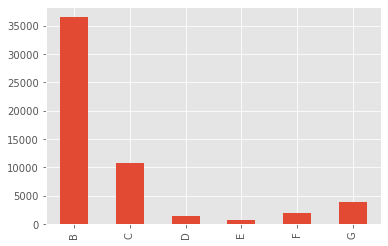

In [ ]:
fireclass.plot(kind='bar')

In [ ]:
df['stat_cause_descr'].value_counts()

Debris Burning       14278
Arson                 9724
Miscellaneous         8344
Lightning             8218
Missing/Undefined     5063
Equipment Use         4107
Campfire              1367
Children              1280
Smoking               1181
Railroad              1021
Powerline              483
Fireworks              223
Structure               78
Name: stat_cause_descr, dtype: int64

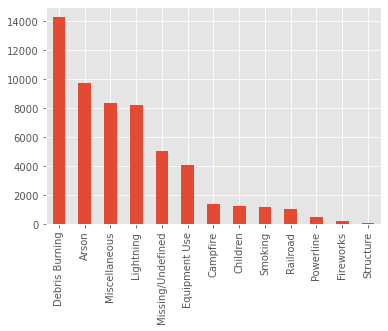

In [ ]:
df['stat_cause_descr'].value_counts().plot(kind='bar')

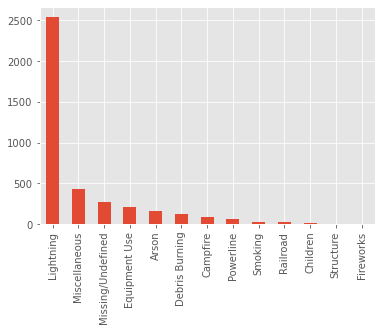

In [ ]:
df2 = df[df.fire_size_class == 'G']
df2['stat_cause_descr'].value_counts().plot(kind='bar')

In [ ]:
main_cause_fireclass = []

for i in fireclass.index:
    x = df[df['fire_size_class'] == i].stat_cause_descr.value_counts()
    main_cause_fireclass.append(x.index[0])
    
main_cause_fireclass

['Debris Burning', 'Arson', 'Arson', 'Lightning', 'Lightning', 'Lightning']

In [ ]:
df.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'fire_name', 'fire_size',
       'fire_size_class', 'stat_cause_descr', 'latitude', 'longitude',
       'state', 'disc_clean_date', 'cont_clean_date', 'discovery_month',
       'disc_date_final', 'cont_date_final', 'putout_time',
       'disc_date_pre', 'disc_pre_year', 'disc_pre_month',
       'wstation_usaf', 'dstation_m', 'wstation_wban', 'wstation_byear',
       'wstation_eyear', 'Vegetation', 'fire_mag', 'weather_file',
       'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7', 'Temp_cont',
       'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont',
       'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30',
       'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'remoteness'],
      dtype=object)

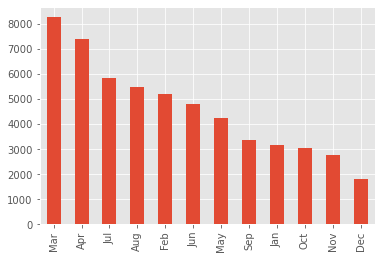

In [ ]:
df['discovery_month'].value_counts().plot(kind='bar')

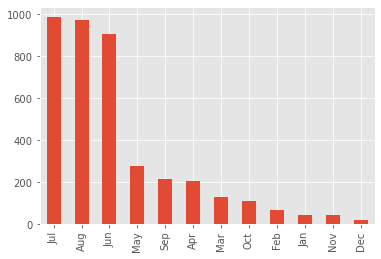

In [ ]:
df2 = df[df.fire_size_class == 'G']
df2['discovery_month'].value_counts().plot(kind='bar')

In [ ]:
month_value = df['discovery_month'].value_counts()
print(month_value)

Mar    8271
Apr    7413
Jul    5834
Aug    5466
Feb    5208
Jun    4805
May    4236
Sep    3350
Jan    3171
Oct    3044
Nov    2768
Dec    1801
Name: discovery_month, dtype: int64


In [ ]:
main_cause_month = []

for j in month_value.index:
    dmx = df[df['discovery_month'] == j].stat_cause_descr.value_counts()
    main_cause_month.append(dmx.index[0])
    
main_cause_month

['Debris Burning',
 'Debris Burning',
 'Lightning',
 'Lightning',
 'Debris Burning',
 'Lightning',
 'Debris Burning',
 'Debris Burning',
 'Debris Burning',
 'Debris Burning',
 'Debris Burning',
 'Debris Burning']

In [ ]:
dfco = df[df.state == 'CO']
dfco.head(10)

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
64,64,64,SPRING GULCH,1.5,B,Lightning,39.205000,-105.188333,CO,7/31/1996,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.347203
119,119,119,EIGHT MILE,2.0,B,Campfire,37.157500,-107.020278,CO,9/20/2008,...,6.919108,40.759654,37.542980,35.340102,53.363057,0.0,0.0,0.0,0.0,0.366083
515,515,515,NaN,200.0,D,Missing/Undefined,39.657929,-107.042258,CO,5/9/2004,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.365035
904,904,904,EASTER,10.0,C,Debris Burning,37.116700,-107.283900,CO,4/11/1998,...,0.000000,58.559816,63.068966,54.743750,0.000000,0.0,0.0,0.0,0.0,0.368680
915,915,915,UNKNOWN,1.0,B,Miscellaneous,40.073600,-104.643000,CO,6/17/2013,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.341516
1029,1029,1029,KEENE,1.0,B,Lightning,40.086100,-108.267300,CO,7/15/1998,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.376829
1081,1081,1081,PASTURE IAE,270.0,D,Lightning,37.053333,-102.351667,CO,7/1/1994,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.320933
1326,1326,1326,NaN,1.0,B,Equipment Use,38.412430,-105.152540,CO,4/28/1995,...,5.352000,57.136000,65.380952,72.102564,65.000000,194.5,193.5,170.5,101.5,0.347245
1346,1346,1346,MIDDLE BALD,1.0,B,Equipment Use,40.764167,-105.641667,CO,8/9/2011,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.350902
1399,1399,1399,UNKNOWN,3.0,B,Smoking,38.462100,-107.866300,CO,3/24/2013,...,0.000000,59.733645,52.997487,44.601124,0.000000,14.1,7.4,3.0,0.0,0.373670


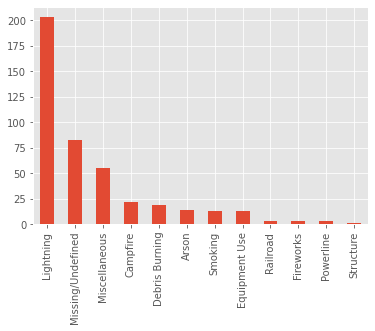

In [ ]:
dfco['stat_cause_descr'].value_counts().plot(kind='bar')

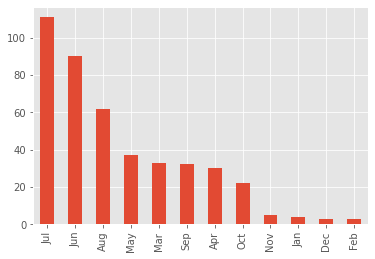

In [ ]:
dfco['discovery_month'].value_counts().plot(kind='bar')

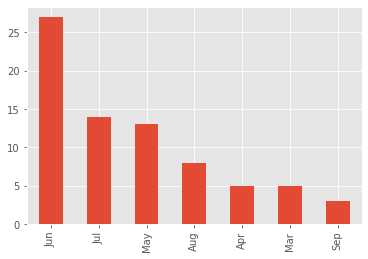

In [ ]:
df3 = dfco[dfco.fire_size_class == 'G']
df3['discovery_month'].value_counts().plot(kind='bar')

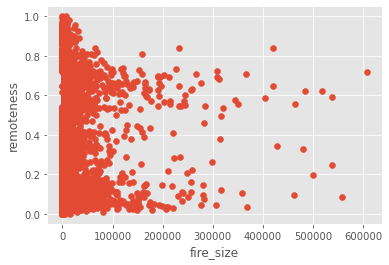

In [ ]:
plt.scatter(df['fire_size'], df['remoteness'])
plt.xlabel('fire_size'); plt.ylabel('remoteness');
plt.show()

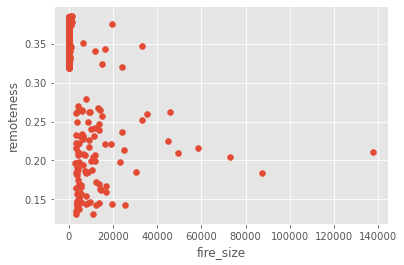

In [ ]:
plt.scatter(dfco['fire_size'], dfco['remoteness'])
plt.xlabel('fire_size'); plt.ylabel('remoteness');
plt.show()

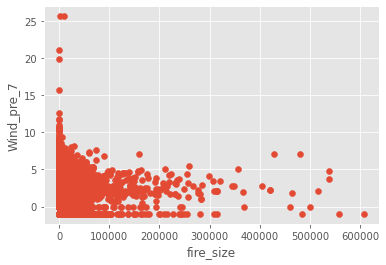

In [ ]:
plt.scatter(df['fire_size'], df['Wind_pre_7'])
plt.xlabel('fire_size'); plt.ylabel('Wind_pre_7');
plt.show()

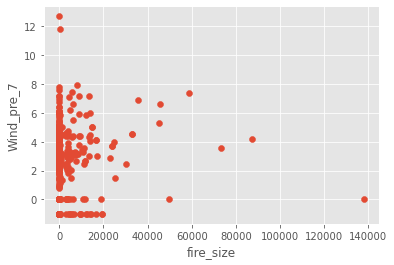

In [ ]:
plt.scatter(dfco['fire_size'], dfco['Wind_pre_7'])
plt.xlabel('fire_size'); plt.ylabel('Wind_pre_7');
plt.show()

In [ ]:
dftest = df.drop(['Unnamed: 0.1','Unnamed: 0', 'fire_name', 'fire_size_class','state','disc_clean_date','cont_clean_date','discovery_month','disc_date_final','cont_date_final','putout_time','disc_date_pre','disc_pre_year','disc_pre_month','wstation_usaf','dstation_m','wstation_wban','wstation_byear','wstation_eyear','weather_file','Temp_cont','Wind_cont','Prec_cont'
], axis=1)

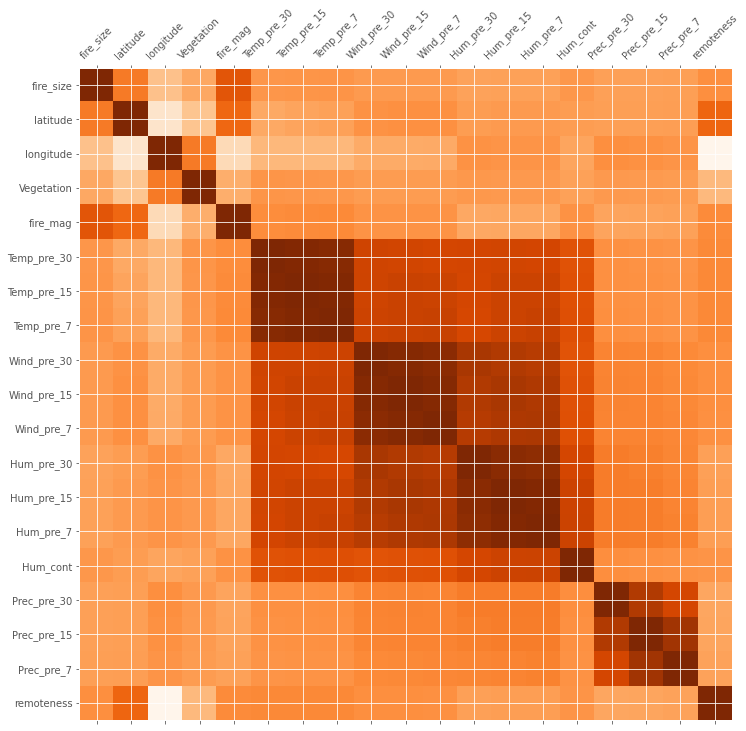

In [ ]:
def plot_corr(df,size=12):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
      
plot_corr(dftest)